In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
#datasets downloaded from kaggle - https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset
fake=pd.read_csv("Fake.csv")
true=pd.read_csv("True.csv")

In [4]:
fake.shape

(23481, 4)

In [5]:
true.shape

(21417, 4)

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


DATA PREPROCESSING

In [8]:
fake['target']='fake'
true['target']='true'

In [9]:
data=pd.concat([fake,true])
data.shape

(44898, 5)

In [10]:
from sklearn.utils import shuffle
data=shuffle(data)


In [11]:
data.head()

,title,text,subject,date,target
860,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,"November 2, 2017",true
22854,Armed US immigration Officers to Be Stationed ...,21st Century Wire says This latest move by the...,Middle-east,"July 10, 2017",fake
17934,FLASHBACK: Mark Steyn: Why The US Is Becoming ...,Mark Steyn is dead on when he calls out the fe...,left-news,"Sep 22, 2017",fake
7867,Racist High Schoolers Chant ‘Trump! Trump! US...,It s becoming clearer and clearer that an Amer...,News,"February 25, 2016",fake
7982,‘Pro-Life’ GOP Refuses To Help Zika Infected ...,The world is scrambling to deal with fallout f...,News,"February 19, 2016",fake


In [12]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
860,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,true
22854,Armed US immigration Officers to Be Stationed ...,21st Century Wire says This latest move by the...,Middle-east,fake
17934,FLASHBACK: Mark Steyn: Why The US Is Becoming ...,Mark Steyn is dead on when he calls out the fe...,left-news,fake
7867,Racist High Schoolers Chant ‘Trump! Trump! US...,It s becoming clearer and clearer that an Amer...,News,fake
7982,‘Pro-Life’ GOP Refuses To Help Zika Infected ...,The world is scrambling to deal with fallout f...,News,fake


In [13]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
860,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,true
22854,21st Century Wire says This latest move by the...,Middle-east,fake
17934,Mark Steyn is dead on when he calls out the fe...,left-news,fake
7867,It s becoming clearer and clearer that an Amer...,News,fake
7982,The world is scrambling to deal with fallout f...,News,fake


In [14]:
data['text']=data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
860,washington (reuters) - the republican tax plan...,politicsNews,true
22854,21st century wire says this latest move by the...,Middle-east,fake
17934,mark steyn is dead on when he calls out the fe...,left-news,fake
7867,it s becoming clearer and clearer that an amer...,News,fake
7982,the world is scrambling to deal with fallout f...,News,fake


In [15]:
import string
def punctuation_removal(text):
  all_list=[char for char in text if char not in string.punctuation]
  clean_str=''.join(all_list)
  return clean_str
data['text']=data['text'].apply(punctuation_removal)

In [16]:
data.head()

,text,subject,target
860,washington reuters the republican tax plan un...,politicsNews,true
22854,21st century wire says this latest move by the...,Middle-east,fake
17934,mark steyn is dead on when he calls out the fe...,left-news,fake
7867,it s becoming clearer and clearer that an amer...,News,fake
7982,the world is scrambling to deal with fallout f...,News,fake


In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')
data['text']=data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aravi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
data.head()

,text,subject,target
860,washington reuters republican tax plan unveile...,politicsNews,true
22854,21st century wire says latest move us sold unw...,Middle-east,fake
17934,mark steyn dead calls feds wiretapping paul ma...,left-news,fake
7867,becoming clearer clearer america donald trump ...,News,fake
7982,world scrambling deal fallout spread zika viru...,News,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


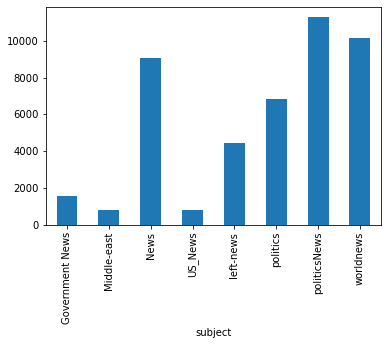

In [20]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind='bar')
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


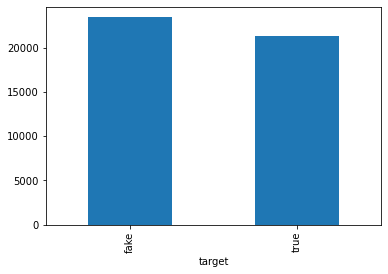

In [21]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [22]:

# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

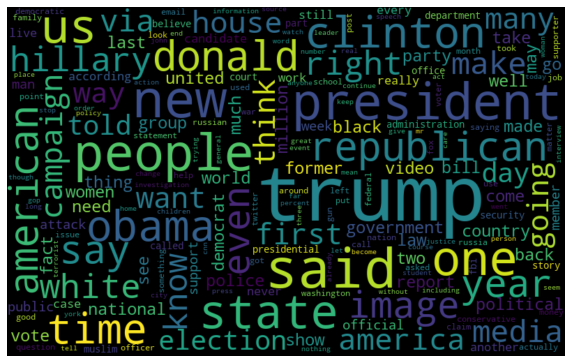

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

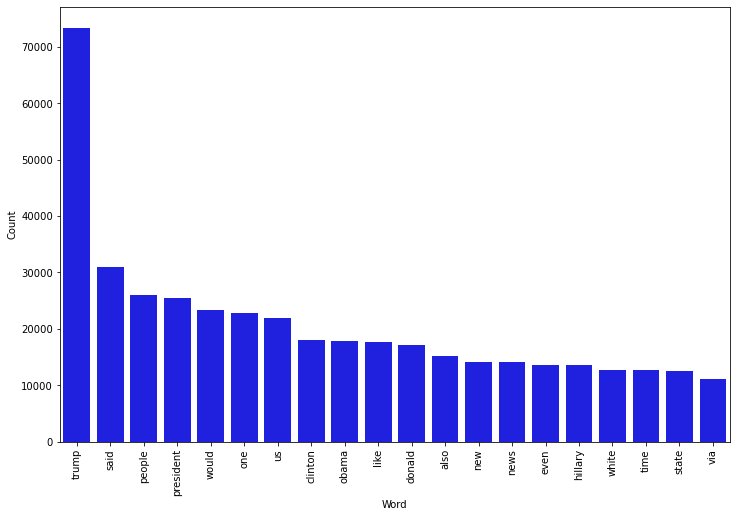

In [24]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

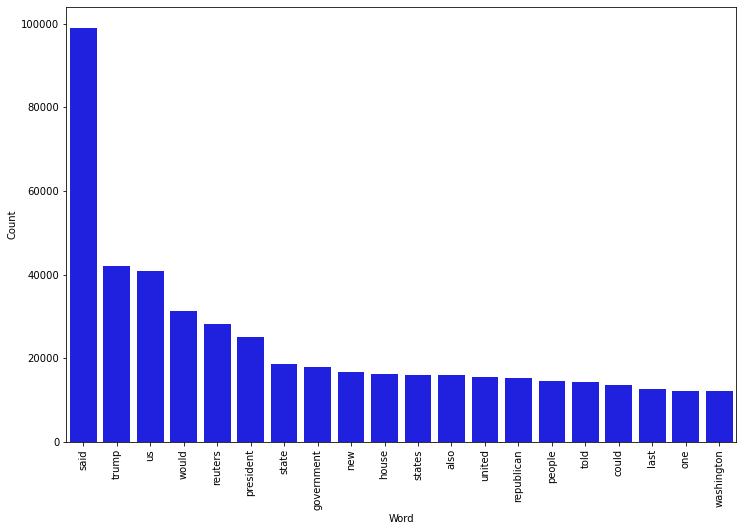

In [25]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

MODELING

In [26]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

PREPARING DATA

In [27]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

LOGISTIC REGRESSION

In [28]:
results=[]

In [29]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

LRpipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = LRpipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
results.append(round(accuracy_score(y_test, prediction)*100,2))

accuracy: 98.9%


Confusion matrix, without normalization


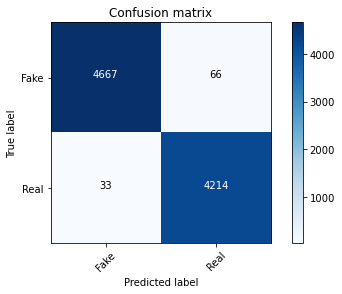

In [30]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

RANDOM FOREST CLASSIFIER

In [31]:
from sklearn.ensemble import RandomForestClassifier

RFpipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = RFpipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
results.append(round(accuracy_score(y_test, prediction)*100,2))

accuracy: 99.18%


Confusion matrix, without normalization


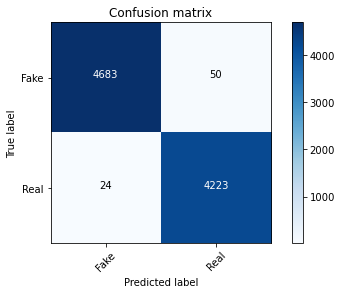

In [32]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

NAIVE-BAYES CLASSIFIER

In [33]:
from sklearn.naive_bayes import MultinomialNB
NBpipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

# Fitting the model
model = NBpipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
results.append(round(accuracy_score(y_test, prediction)*100,2))

accuracy: 95.38%


Confusion matrix, without normalization


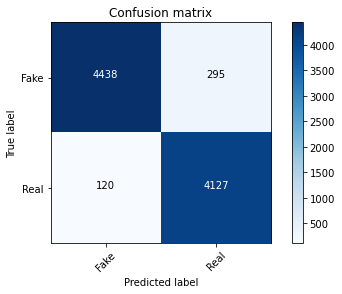

In [34]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

SVM CLASSIFIER

In [41]:
from sklearn import svm
SVMpipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',svm.LinearSVC())])
# Fitting the model
model = SVMpipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
results.append(round(accuracy_score(y_test, prediction)*100,2))

accuracy: 99.55%


Confusion matrix, without normalization


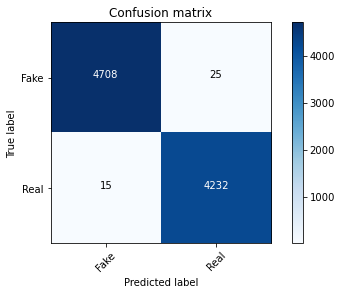

In [42]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Stochastic Gradient Descent Classifier

In [37]:
from sklearn.linear_model import SGDClassifier
SGDpipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))])
# Fitting the model
model = SGDpipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
results.append(round(accuracy_score(y_test, prediction)*100,2))

accuracy: 97.76%


Confusion matrix, without normalization


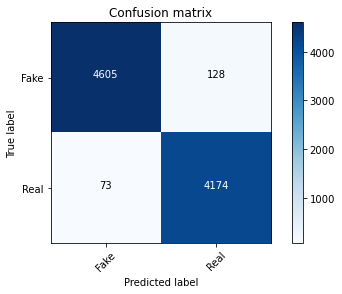

In [38]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [39]:
names=['Logistic Regression','Random Forest','Naive Bayes','SVM','SGD']

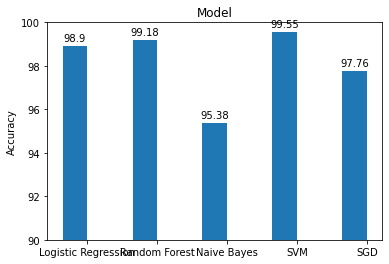

In [40]:
from matplotlib import pyplot as plt
import numpy as np

x = np.arange(len(names)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()

ax.set_ylabel('Accuracy')
ax.set_title('Model')
ax.set_xticks(x)
ax.set_xticklabels(names)

pps = ax.bar(x - width/2, results, width, label='model_evaluation')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
plt.ylim(90,100)

plt.show()

In [43]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

In [49]:
model = pickle.load(open('model.pkl','rb'))
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.55%


In [51]:
print(prediction)

['true' 'true' 'fake' ... 'true' 'fake' 'fake']


In [62]:
print(model.predict(['Donald Trump loves White People']))

['true']


In [56]:
X_test.iloc[1]

'version oct 25 story corrects story change name emilio lozoya paragraph three mexico city reuters prosecutor led investigation graft scandal involving campaign mexican president enrique pena nieto said wednesday fired without justification senate prepares vote whether reinstate mexico acting attorney general fired santiago nieto attorney general electionrelated crimes last week grounds broke code conduct summary dismissal came days explosive interview newspaper reforma nieto accused emilio lozoya former boss state oil firm pemex senior member pena nieto 2012 campaign team writing ask declared innocent funneling odebrecht cash president campaign brazilian construction firm odebrecht heart brazilian bribery kickback probe known lava jato car wash reverberated across latin america javier coello trejo lozoya lawyer said wednesday filed two criminal complaints nieto alleging former prosecutor violated laws governing criminal proceedings broadcaster televisa reported nieto firing angered op